In [195]:
import pandas as pd, numpy as np, os, seaborn, matplotlib.pyplot as plt

In [196]:
iris_df = pd.read_csv('iris.csv')
iris_df.head()

,ID,sepallength,sepalwidth,petallength,petalwidth,class
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Verificar se há valores nulos ou negativos.

In [197]:
print(iris_df.isna().any().any())
print(iris_df.isnull().any().any())
print((iris_df.select_dtypes(include=[np.number]) < 0).any().any())

False
False
False


Codificação do target.

In [198]:
class_dict = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
iris_df['class'] = iris_df['class'].map(class_dict)

Sem valores nulos ou negativos, logo podemos continuar.

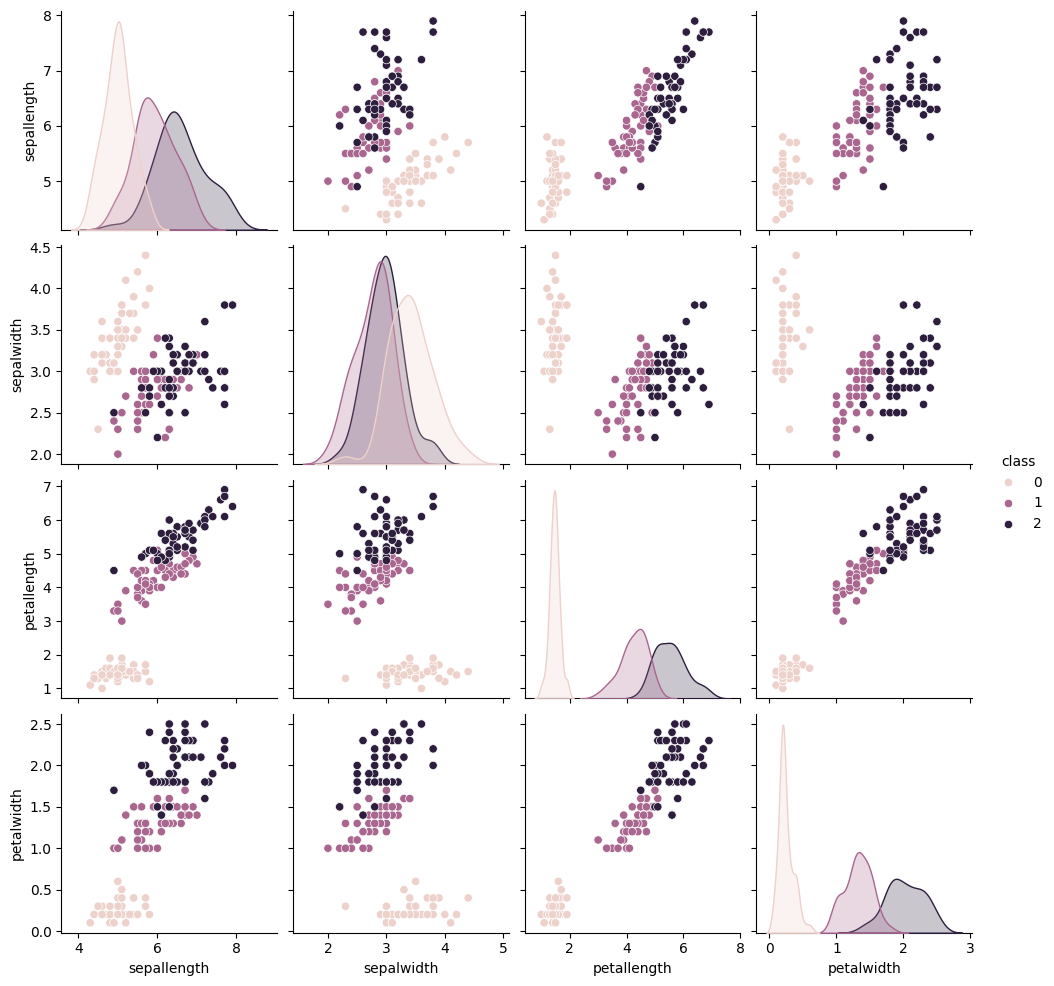

In [199]:
seaborn.pairplot(iris_df, hue='class', vars=['sepallength', 'sepalwidth', 'petallength', 'petalwidth'])
plt.show()

De facto pelas imagens, os atributos com maior relação á classe final são 'petallength' e 'petalwidth', com divisões bastante percetíveis.

In [200]:
iris_df.head()

,ID,sepallength,sepalwidth,petallength,petalwidth,class
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


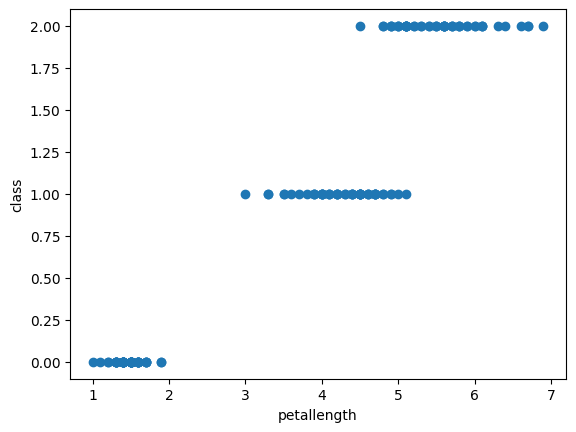

In [201]:
plt.scatter(iris_df['petallength'],iris_df['class'])
plt.xlabel('petallength')
plt.ylabel('class')
plt.show()

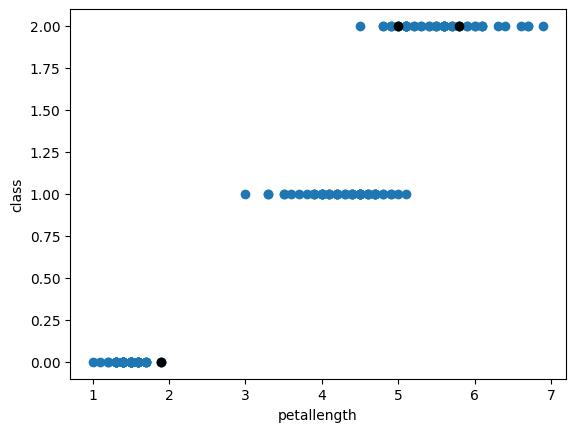

In [202]:
K = 3
centroids = iris_df.sample(n = K)
plt.scatter(iris_df['petallength'],iris_df['class'])
plt.scatter(centroids['petallength'],centroids['class'],c='black')
plt.xlabel('petallength')
plt.ylabel('class')
plt.show()

In [203]:
mask = iris_df['ID'].isin(centroids.ID.tolist())
X = iris_df[~mask] #todos as samples exceto os centroids
diff = 1 #variavel para verificar quando os centroids param de  ser mudados
j = 0
XD = X
while(diff!=0):
    i=1
   
    for index1, row_c in centroids.iterrows(): #itera cada centroid
        
        ED=[] #lista para a distancia entre cada ponto e o centroid em causa
       
        for index2, row_d in XD.iterrows(): #itera cada sample \ centroids
            d1=( row_c["petallength"] - row_d["petallength"] ) ** 2
            d2=( row_c["class"] - row_d["class"] ) ** 2
            
            d=np.sqrt(d1+d2) #distancia centroid e sample
            ED.append(d)
            
        X[i] = ED #associa-se a cada sample a distancia entre o centroid e ela
        i=i+1

    C=[]
    for _, row in X.iterrows(): #itera cada sample
        min_dist = (None, float('inf'))
        
        for i in range(1, K + 1): #passa se por K centroids
            
            if row[i] < min_dist[1]: #verificar qual a dist minima entre sample e centroid
                min_dist = (i, row[i])
                
        C.append(min_dist[0]) #guarda se o centroid mais perto daquela sample
        
    X["Cluster"] = C
    
    centroids_new = X.groupby(["Cluster"]).mean()[["class","petallength"]]
    if j == 0:
       diff=1
       j=j+1
    else:
        diff = (centroids_new['class'] - centroids['class']).sum() + (centroids_new['petallength'] - centroids['petallength']).sum() #se os novos centroides forem igual aos antigos, diff==0 e acaba
    centroids = X.groupby(["Cluster"]).mean()[["class","petallength"]] #update centroids




C:\Users\mdini\AppData\Local\Temp\ipykernel_8104\2412859798.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = ED #associa-se a cada sample a distancia entre o centroid e ela
C:\Users\mdini\AppData\Local\Temp\ipykernel_8104\2412859798.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = ED #associa-se a cada sample a distancia entre o centroid e ela
C:\Users\mdini\AppData\Local\Temp\ipykernel_8104\2412859798.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [204]:
centroids

,petallength
Cluster,
1,5.580851
2,4.264706
3,1.455102


In [205]:
# color=['grey','blue','orange']
# for k in range(K):
#    data=X[X["Cluster"]==k+1]
#    plt.scatter(data["petallength"],data["class"],c=color[k])
# plt.scatter(centroids["petallength"],centroids["class"],c='black')
# plt.xlabel('petallength')
# plt.ylabel('class')
# plt.show()